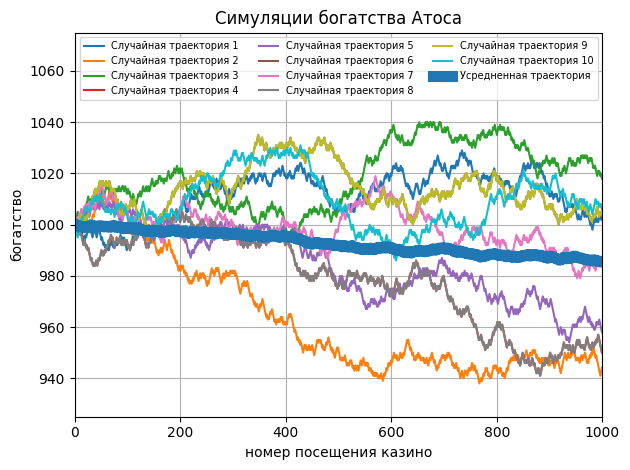

Comments:
Усредненная траектория идет вниз, т.к матожидание < 1


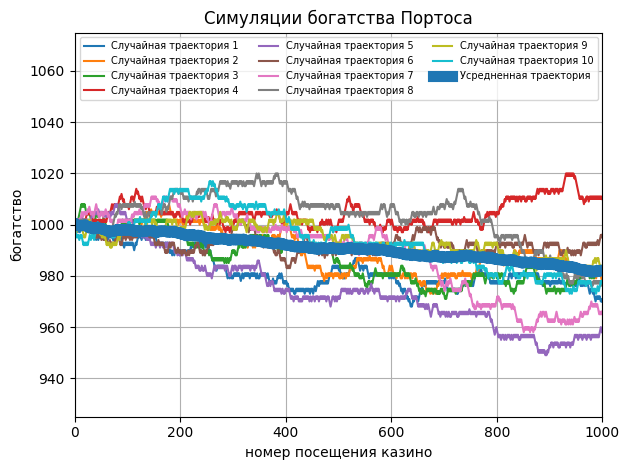

Comments:
Усредненная траектория также идет вниз, т.к матожидание < 1


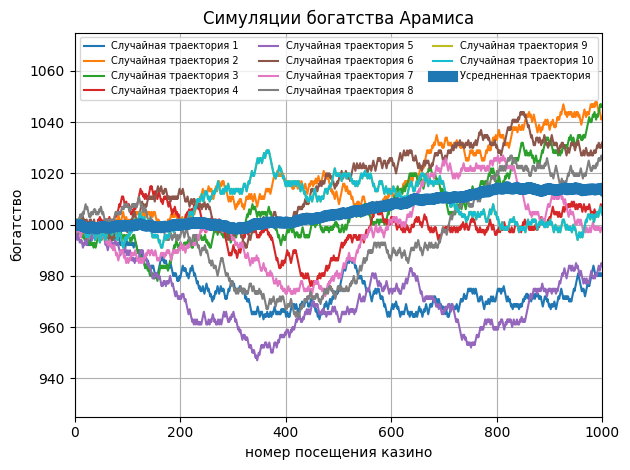

Comments:
Теперь же усредненная траектория идет вверх (согласно Парадоксу Паррондо)
Получается, что комбинация проигрышных игр может вести к выигрышу (матожидание > 1)


In [38]:
import random
import numpy as np

from matplotlib import pyplot as plt


def single_play_A(money: int):
    if random.random() <= 0.49:
        return money + 1
    else:
        return money - 1


def single_play_B(money: int):
    if money % 3 == 0:
        prob1 = 0.09
    else:
        prob1 = 0.74

    if random.random() <= prob1:
        return money + 1
    else:
        return money - 1


def simulate_finances_atos() -> list[int]:
    money = INITIAL_MONEY
    values_list = list()

    for _ in range(SIMULATION_SIZE):
        money = single_play_A(money)

        values_list.append(money)

    return values_list


def simulate_finances_portos() -> list[int]:
    money = INITIAL_MONEY
    values_list = list()

    for _ in range(SIMULATION_SIZE):
        money = single_play_B(money)

        values_list.append(money)

    return values_list


def simulate_finances_aramis() -> list[int]:
    money = INITIAL_MONEY
    values_list = list()

    for _ in range(SIMULATION_SIZE):
        if random.random() <= 0.5:
            money = single_play_A(money)
        else:
            money = single_play_B(money)
        values_list.append(money)

    return values_list


INITIAL_MONEY = 1000
SIMULATION_SIZE = 1000
SIMULATIONS_COUNT = 50 # 10 ** 4

random.seed(10)

atos_simulations: list[list[int]] = [simulate_finances_atos() for _ in range(SIMULATIONS_COUNT)]
portos_simulations: list[list[int]] = [simulate_finances_portos() for _ in range(SIMULATIONS_COUNT)]
aramis_simulations: list[list[int]] = [simulate_finances_aramis() for _ in range(SIMULATIONS_COUNT)]


def draw_simulations_graph(simulations_list: list[list[int]], title=None):
    averaged_simulation = np.mean(
        np.array(simulations_list),
        axis=0
    )

    rand_10_simulations = [random.choice(simulations_list) for _ in range(10)]

    x_start = 0
    x_end = x_start + SIMULATION_SIZE

    x_coords = [i for i in range(x_start, x_end)]

    y_delta = 75
    y_bottom = INITIAL_MONEY - y_delta
    y_top = INITIAL_MONEY + y_delta

    plt.grid()
    plt.rcParams["figure.autolayout"] = True
    plt.xlim(x_start, x_end)
    plt.ylim(y_bottom, y_top)

    for i in range(len(rand_10_simulations)):
        values = rand_10_simulations[i]
        plt.plot(x_coords, values, label=f"Случайная траектория {i + 1}")
    plt.plot(x_coords, averaged_simulation, linewidth='8', label="Усредненная траектория")

    plt.xlabel("номер посещения казино")
    plt.ylabel("богатство")
    plt.title(title)
    plt.legend(
        ncol=3,
        fontsize="7"
    )
    plt.show()


draw_simulations_graph(atos_simulations, "Симуляции богатства Атоса")
print("Comments:")
print("Усредненная траектория идет вниз, т.к матожидание < 1")

draw_simulations_graph(portos_simulations, "Симуляции богатства Портоса")
print("Comments:")
print("Усредненная траектория также идет вниз, т.к матожидание < 1")

draw_simulations_graph(aramis_simulations, "Симуляции богатства Арамиса")
print("Comments:")
print("Теперь же усредненная траектория идет вверх (согласно Парадоксу Паррондо)")
print("Получается, что комбинация проигрышных игр может вести к выигрышу (матожидание > 1)")
